In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "data/ex1data1.txt"
data = np.loadtxt(filename, delimiter=',', usecols=(0, 1), unpack=True)

X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size
X = np.insert(X, 0, 1, axis=1) # Adding 1's to the first index for bias.

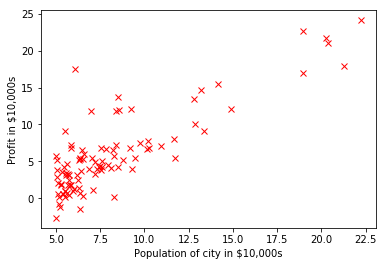

In [3]:
plt.plot(X[:, 1], y, 'rx')
plt.xlabel('Population of city in $10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:
def compute_cost(X, y, W):
    return 1 / (2 * m) * np.sum((np.dot(X, W) - y) ** 2)

def l1_regularization(alpha, W):
    return alpha * np.sum(np.abs(W))

def l2_regularization(alpha, W):
    return 0.5 * alpha * np.sum(W ** 2)
    
# grad = lamda * ((alpha * np.sign(W)) + ((1-alpha) * W))
def l1_l2_regularization(lamda, alpha, W):
    l1 = l1_regularization(alpha, W)
    l2 = l2_regularization((1-alpha)/2, W)
    return lamda * (l1 + l2)


class ElasticNet:
    
    def __init__(self, alpha=1.0, lamda=1.0, lr=0.01, num_iters=1500):
        
        self.alpha = alpha
        self.lamda = lamda
        self.lr = lr
        self.num_iters = num_iters
        
    def fit(self, X, y):
        self.W = np.zeros((X.shape[1], 1))
        for _ in range(self.num_iters):
            cost = compute_cost(X, y, self.W) + l1_l2_regularization(self.lamda, self.alpha, self.W)
            grad = np.dot(X.T, np.dot(X, self.W) - y) + self.lamda * \
                                                    ((self.alpha * np.sign(self.W)) + # l1
                                                     ((1-self.alpha) * self.W)) # l2
            self.W -= self.lr * (1 / m) * grad
    
    def predict(self, X):
        return np.dot(X, self.W)

In [5]:
enet = ElasticNet()
enet.fit(X, y)
preds = enet.predict(X)

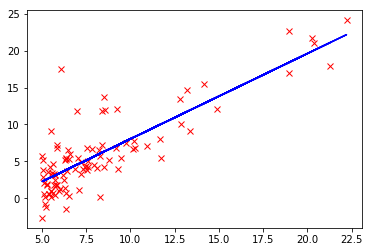

In [6]:
plt.plot(X[:, 1], y, 'rx')
plt.plot(X[:, 1], preds, 'b')
plt.show()

In [7]:
# Sklearn way
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
enet.fit(X, y)
preds = enet.predict(X)

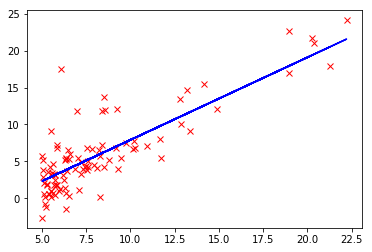

In [8]:
plt.plot(X[:, 1], y, 'rx')
plt.plot(X[:, 1], preds, 'b')
plt.show()